# Google BigQuery Connect with Jupyter notebook

In [2]:
import pydata_google_auth
credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)

# Import Python module

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from tabulate import tabulate

In [4]:
query = """SELECT *
FROM PrimaryType.PrimaryType_count""" 
project_id = 'modular-magpie-255714'

In [5]:
pty = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)

In [6]:
pty_crime = []
crime_lst_y = list(pty['Primary_Type'].unique())

for i in range(len(crime_lst_y)):
    pty_crime.append(pty[pty['Primary_Type'] == crime_lst_y[i]])


In [7]:
ptydf = pty_crime[0].copy()
ptydf.drop(["Primary_Type"], axis = 1, inplace = True)
ptydf.rename(columns={'Count': crime_lst_y[0]+'Count'}, inplace=True)

In [8]:
for i in range(1,len(crime_lst_y)):    
    name = crime_lst_y[i]+'Count'
    
    print(i,name)
    
    ptydf = pd.merge(ptydf,pty_crime[i],on="Year",how = "left")
    ptydf.drop(["Primary_Type"], axis = 1, inplace = True)
    ptydf.rename(columns={'Count': name}, inplace=True)
    

1 ASSAULTCount
2 BATTERYCount
3 BURGLARYCount
4 CONCEALED CARRY LICENSE VIOLATIONCount
5 CRIM SEXUAL ASSAULTCount
6 CRIMINAL DAMAGECount
7 CRIMINAL TRESPASSCount
8 DECEPTIVE PRACTICECount
9 DOMESTIC VIOLENCECount
10 GAMBLINGCount
11 HOMICIDECount
12 HUMAN TRAFFICKINGCount
13 INTERFERENCE WITH PUBLIC OFFICERCount
14 INTIMIDATIONCount
15 KIDNAPPINGCount
16 LIQUOR LAW VIOLATIONCount
17 MOTOR VEHICLE THEFTCount
18 NARCOTICSCount
19 NON-CRIMINALCount
20 OBSCENITYCount
21 OFFENSE INVOLVING CHILDRENCount
22 OTHER NARCOTIC VIOLATIONCount
23 OTHER OFFENSECount
24 PROSTITUTIONCount
25 PUBLIC INDECENCYCount
26 PUBLIC PEACE VIOLATIONCount
27 RITUALISMCount
28 ROBBERYCount
29 SEX OFFENSECount
30 STALKINGCount
31 THEFTCount
32 WEAPONS VIOLATIONCount


In [9]:
ptydf

Year  ARSONCount  ASSAULTCount  BATTERYCount  BURGLARYCount  \
0   2001        1004         31260         93051          25943   
1   2002         978         30733         91723          25221   
2   2003         953         29292         87835          25010   
3   2004         774         28792         86966          24520   
4   2005         688         26965         83637          25413   
5   2006         726         25929         80571          24304   
6   2007         710         26305         79560          24838   
7   2008         643         25273         75462          26012   
8   2009         612         22616         67766          26495   
9   2010         522         21533         65394          26421   
10  2011         504         20406         60446          26616   
11  2012         469         19897         59126          22840   
12  2013         364         17969         53992          17893   
13  2014         396         16889         49415          14562   
14  2015         453         16992         48822          13103   
15  2016         515         18720         50245          14278   
16  2017         444         19251         49135          12946   
17  2018         373         20342         49714          11688   
18  2019         262         15208         36522           6785   

    CONCEALED CARRY LICENSE VIOLATIONCount  CRIM SEXUAL ASSAULTCount  \
0                                      NaN                      1763   
1                                      NaN                      1702   
2                                      NaN                      1533   
3                                      NaN                      1466   
4                                      NaN                      1422   
5                                      NaN                      1368   
6                                      NaN                      1460   
7                                      NaN                      1412   
8                                      NaN                      1305   
9                                      NaN                      1334   
10                                     NaN                      1451   
11                                     NaN                      1391   
12                                     NaN                      1250   
13                                    15.0                      1264   
14                                    34.0                      1267   
15                                    35.0                      1490   
16                                    69.0                      1534   
17                                   148.0                      1557   
18                                   165.0                      1147   

    CRIMINAL DAMAGECount  CRIMINAL TRESPASSCount  DECEPTIVE PRACTICECount  \
0                  55590                   13182                    14774   
1                  54708                   13570                    13237   
2                  54694                   14687                    13255   
3                  53070                   15834                    13078   
4                  54351                   16569                    13153   
5                  57076                   14488                    13266   
6                  53713                   13690                    13870   
7                  52201                   12221                    14281   
8                  47253                   10747                    13278   
9                  40648                    9401                    12329   
10                 37327                    8657                    12391   
11                 35853                    8215                    13276   
12                 30851                    8135                    13249   
13                 27778                    7535                    14887   
14                 28590                    6391                   

In [10]:
list(ptydf.columns)

['Year',
 'ARSONCount',
 'ASSAULTCount',
 'BATTERYCount',
 'BURGLARYCount',
 'CONCEALED CARRY LICENSE VIOLATIONCount',
 'CRIM SEXUAL ASSAULTCount',
 'CRIMINAL DAMAGECount',
 'CRIMINAL TRESPASSCount',
 'DECEPTIVE PRACTICECount',
 'DOMESTIC VIOLENCECount',
 'GAMBLINGCount',
 'HOMICIDECount',
 'HUMAN TRAFFICKINGCount',
 'INTERFERENCE WITH PUBLIC OFFICERCount',
 'INTIMIDATIONCount',
 'KIDNAPPINGCount',
 'LIQUOR LAW VIOLATIONCount',
 'MOTOR VEHICLE THEFTCount',
 'NARCOTICSCount',
 'NON-CRIMINALCount',
 'OBSCENITYCount',
 'OFFENSE INVOLVING CHILDRENCount',
 'OTHER NARCOTIC VIOLATIONCount',
 'OTHER OFFENSECount',
 'PROSTITUTIONCount',
 'PUBLIC INDECENCYCount',
 'PUBLIC PEACE VIOLATIONCount',
 'RITUALISMCount',
 'ROBBERYCount',
 'SEX OFFENSECount',
 'STALKINGCount',
 'THEFTCount',
 'WEAPONS VIOLATIONCount']

* DOMESTIC VIOLENCE count 제거(모두 NA값)

In [11]:
ptydf.drop(['DOMESTIC VIOLENCECount'],axis=1,inplace = True)

## 1. 연도별 범죄 간 상관관계

In [12]:
ptydf.corr()

Year  ARSONCount  ASSAULTCount  \
Year                                    1.000000   -0.938402     -0.943192   
ARSONCount                             -0.938402    1.000000      0.960354   
ASSAULTCount                           -0.943192    0.960354      1.000000   
BATTERYCount                           -0.984117    0.949809      0.981315   
BURGLARYCount                          -0.849328    0.710613      0.745422   
CONCEALED CARRY LICENSE VIOLATIONCount  0.944508   -0.772537     -0.011788   
CRIM SEXUAL ASSAULTCount               -0.530893    0.713982      0.710096   
CRIMINAL DAMAGECount                   -0.950650    0.899112      0.938710   
CRIMINAL TRESPASSCount                 -0.924874    0.838271      0.913004   
DECEPTIVE PRACTICECount                 0.433446   -0.191145     -0.206694   
GAMBLINGCount                          -0.857369    0.713225      0.781975   
HOMICIDECount                          -0.061770    0.354839      0.248598   
HUMAN TRAFFICKINGCount                  0.637598    0.189158      0.139735   
INTERFERENCE WITH PUBLIC OFFICERCount   0.877199   -0.905210     -0.912942   
INTIMIDATIONCount                      -0.898942    0.904451      0.949944   
KIDNAPPINGCount                        -0.866495    0.928047      0.877451   
LIQUOR LAW VIOLATIONCount              -0.971707    0.939564      0.945578   
MOTOR VEHICLE THEFTCount               -0.955390    0.893972      0.922257   
NARCOTICSCount                         -0.935696    0.779307      0.828673   
NON-CRIMINALCount                       0.462047    0.315164      0.057644   
OBSCENITYCount                          0.752776   -0.572109     -0.563284   
OFFENSE INVOLVING CHILDRENCount        -0.725458    0.640540      0.702153   
OTHER NARCOTIC VIOLATIONCount          -0.199747    0.084899      0.156511   
OTHER OFFENSECount                     -0.967376    0.946833      0.968971   
PROSTITUTIONCount                      -0.938968    0.869465      0.921050   
PUBLIC INDECENCYCount                   0.488022   -0.438196     -0.493864   
PUBLIC PEACE VIOLATIONCount            -0.517429    0.271445      0.281699   
RITUALISMCount                         -0.306186    0.323714      0.191921   
ROBBERYCount                           -0.923292    0.889889      0.902487   
SEX OFFENSECount                       -0.928229    0.955836      0.969246   
STALKINGCount                          -0.554701    0.624207      0.695438   
THEFTCount                             -0.957190    0.911755      0.947581   
WEAPONS VIOLATIONCount                  0.093964    0.037027      0.168123   

                                        BATTERYCount  BURGLARYCount  \
Year                                       -0.984117      -0.849328   
ARSONCount                                  0.949809       0.710613   
ASSAULTCount                                0.981315       0.745422   
BATTERYCount                                1.000000       0.828165   
BURGLARYCount                               0.828165       1.000000   
CONCEALED CARRY LICENSE VIOLATIONCount     -0.657666      -0.869110   
CRIM SEXUAL ASSAULTCount                    0.606979       0.362300   
CRIMINAL DAMAGECount                        0.973325       0.863065   
CRIMINAL TRESPASSCount                      0.948924       0.777901   
DECEPTIVE PRACTICECount                    -0.324302      -0.488750   
GAMBLINGCount                               0.861318       0.888562   
HOMICIDECount                               0.135781      -0.092286   
HUMAN TRAFFICKINGCount                     -0.338977      -0.558818   
INTERFERENCE WITH PUBLIC OFFICERCount      -0.900663      -0.742022   
INTIMIDATIONCount                           0.934112       0.705497   
KIDNAPPINGCount                             0.850370       0.585258   
LIQUOR LAW VIOLATIONCount                   0.966672       0.799062   
MOTOR VEHICLE THEFTCount                    0.954049       0.881005   
NARCOTICSCount                            

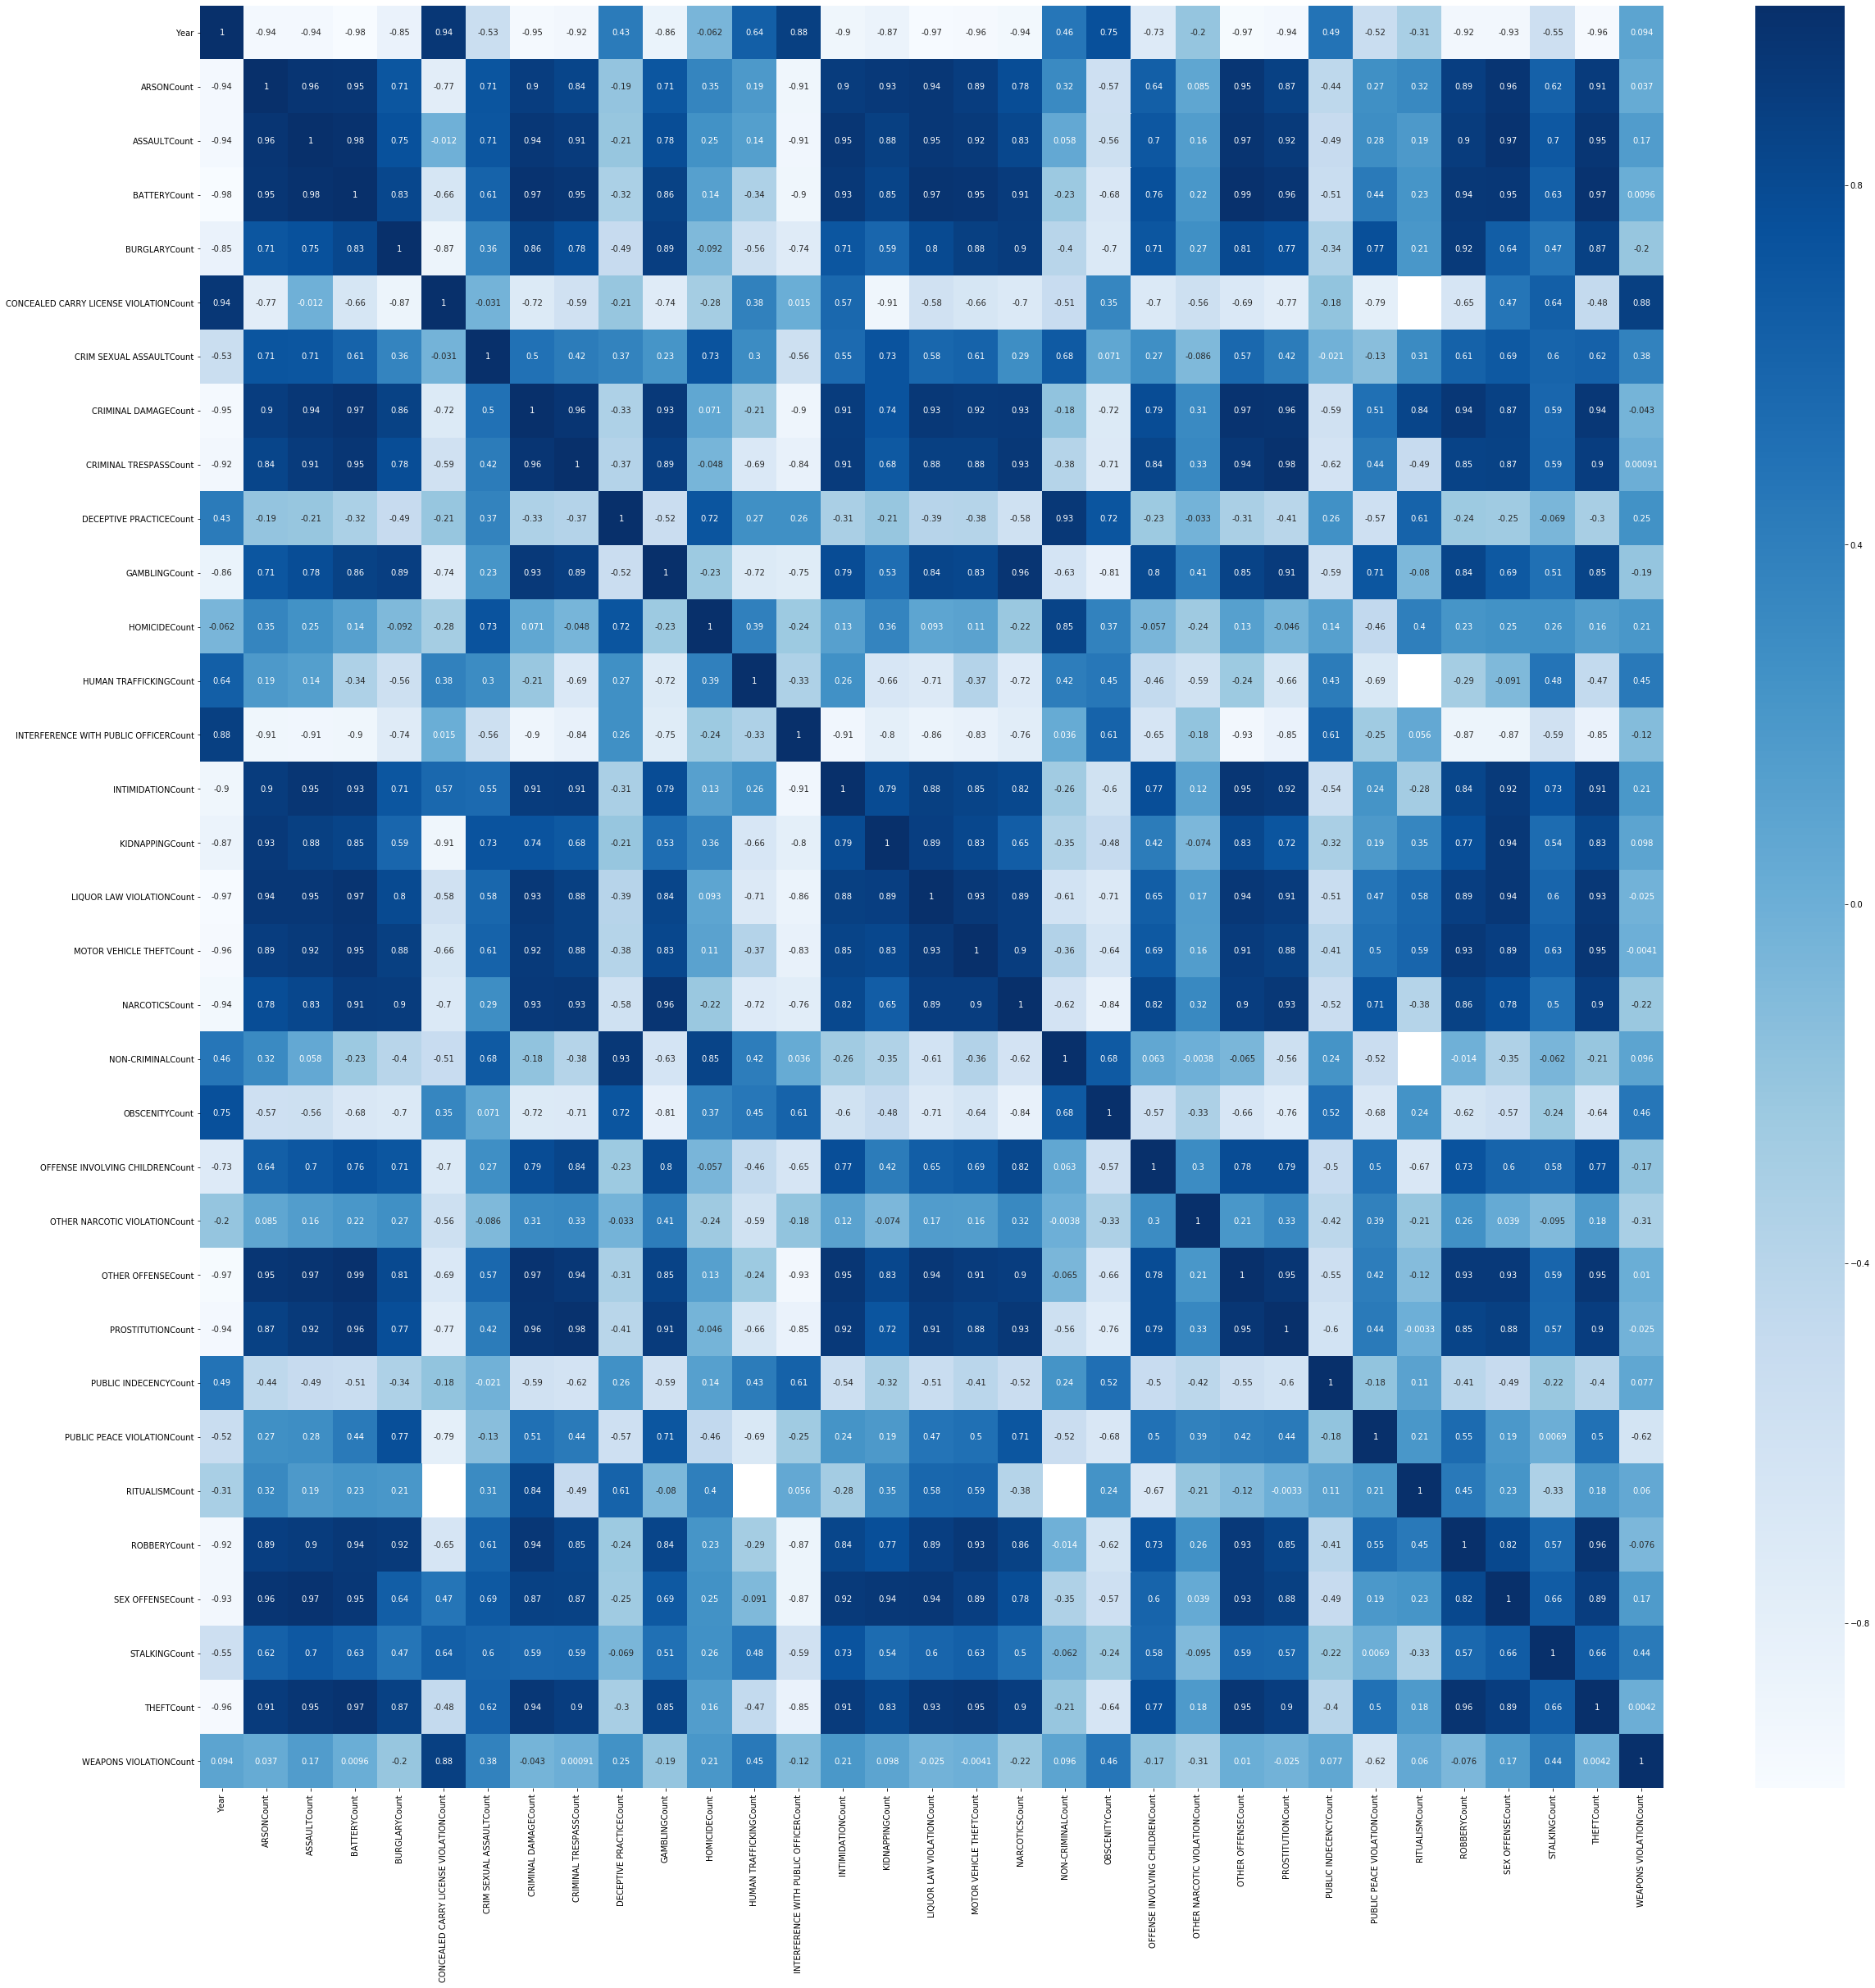

In [13]:
plt.figure(figsize=(40,40))
ax = sns.heatmap(ptydf.corr(), annot = True, cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# 2. 상관관계 각 범죄별로 자세히 보기

In [14]:
ptydf_corr = ptydf.corr()

In [15]:
ptydf_corr

Year  ARSONCount  ASSAULTCount  \
Year                                    1.000000   -0.938402     -0.943192   
ARSONCount                             -0.938402    1.000000      0.960354   
ASSAULTCount                           -0.943192    0.960354      1.000000   
BATTERYCount                           -0.984117    0.949809      0.981315   
BURGLARYCount                          -0.849328    0.710613      0.745422   
CONCEALED CARRY LICENSE VIOLATIONCount  0.944508   -0.772537     -0.011788   
CRIM SEXUAL ASSAULTCount               -0.530893    0.713982      0.710096   
CRIMINAL DAMAGECount                   -0.950650    0.899112      0.938710   
CRIMINAL TRESPASSCount                 -0.924874    0.838271      0.913004   
DECEPTIVE PRACTICECount                 0.433446   -0.191145     -0.206694   
GAMBLINGCount                          -0.857369    0.713225      0.781975   
HOMICIDECount                          -0.061770    0.354839      0.248598   
HUMAN TRAFFICKINGCount                  0.637598    0.189158      0.139735   
INTERFERENCE WITH PUBLIC OFFICERCount   0.877199   -0.905210     -0.912942   
INTIMIDATIONCount                      -0.898942    0.904451      0.949944   
KIDNAPPINGCount                        -0.866495    0.928047      0.877451   
LIQUOR LAW VIOLATIONCount              -0.971707    0.939564      0.945578   
MOTOR VEHICLE THEFTCount               -0.955390    0.893972      0.922257   
NARCOTICSCount                         -0.935696    0.779307      0.828673   
NON-CRIMINALCount                       0.462047    0.315164      0.057644   
OBSCENITYCount                          0.752776   -0.572109     -0.563284   
OFFENSE INVOLVING CHILDRENCount        -0.725458    0.640540      0.702153   
OTHER NARCOTIC VIOLATIONCount          -0.199747    0.084899      0.156511   
OTHER OFFENSECount                     -0.967376    0.946833      0.968971   
PROSTITUTIONCount                      -0.938968    0.869465      0.921050   
PUBLIC INDECENCYCount                   0.488022   -0.438196     -0.493864   
PUBLIC PEACE VIOLATIONCount            -0.517429    0.271445      0.281699   
RITUALISMCount                         -0.306186    0.323714      0.191921   
ROBBERYCount                           -0.923292    0.889889      0.902487   
SEX OFFENSECount                       -0.928229    0.955836      0.969246   
STALKINGCount                          -0.554701    0.624207      0.695438   
THEFTCount                             -0.957190    0.911755      0.947581   
WEAPONS VIOLATIONCount                  0.093964    0.037027      0.168123   

                                        BATTERYCount  BURGLARYCount  \
Year                                       -0.984117      -0.849328   
ARSONCount                                  0.949809       0.710613   
ASSAULTCount                                0.981315       0.745422   
BATTERYCount                                1.000000       0.828165   
BURGLARYCount                               0.828165       1.000000   
CONCEALED CARRY LICENSE VIOLATIONCount     -0.657666      -0.869110   
CRIM SEXUAL ASSAULTCount                    0.606979       0.362300   
CRIMINAL DAMAGECount                        0.973325       0.863065   
CRIMINAL TRESPASSCount                      0.948924       0.777901   
DECEPTIVE PRACTICECount                    -0.324302      -0.488750   
GAMBLINGCount                               0.861318       0.888562   
HOMICIDECount                               0.135781      -0.092286   
HUMAN TRAFFICKINGCount                     -0.338977      -0.558818   
INTERFERENCE WITH PUBLIC OFFICERCount      -0.900663      -0.742022   
INTIMIDATIONCount                           0.934112       0.705497   
KIDNAPPINGCount                             0.850370       0.585258   
LIQUOR LAW VIOLATIONCount                   0.966672       0.799062   
MOTOR VEHICLE THEFTCount                    0.954049       0.881005   
NARCOTICSCount                            

### Correlation column 

In [16]:
ptydf_ccol = list(ptydf_corr.columns)

### list 종류
* origin_corr(원본)
* abs_corr(절댓값)
* as_corr(오름차순)
* des_corr(내림차순)

In [17]:
orig_corr = []
abs_corr = []
as_corr = []
des_corr = []

for i in range(len(ptydf_ccol)):
    
    tmp = ptydf_corr[ptydf_ccol[i]].to_frame().reset_index()
    tmpabs = tmp.copy()
    tmpas = tmp.copy()
    tmpds = tmp.copy()
    
    tmpabs['Abs'] = tmpabs[ptydf_ccol[i]].apply(lambda x: abs(x))
    tmpabs.sort_values(by = ['Abs'], ascending=[False], inplace = True)
    
    tmpas.sort_values(by = [ptydf_ccol[i]], ascending=[True], inplace = True)
    
    tmpds.sort_values(by = [ptydf_ccol[i]], ascending=[False], inplace = True)
    
    orig_corr.append(tmp)
    abs_corr.append(tmpabs)
    as_corr.append(tmpas)
    des_corr.append(tmpds)
        

In [18]:
for i in range(len(abs_corr)):
    print(ptydf_ccol[i])
    print (tabulate(abs_corr[i], headers='keys', tablefmt='psql'))
    print()

Year
+----+----------------------------------------+------------+-----------+
|    | index                                  |       Year |       Abs |
|----+----------------------------------------+------------+-----------|
|  0 | Year                                   |  1         | 1         |
|  3 | BATTERYCount                           | -0.984117  | 0.984117  |
| 16 | LIQUOR LAW VIOLATIONCount              | -0.971707  | 0.971707  |
| 23 | OTHER OFFENSECount                     | -0.967376  | 0.967376  |
| 31 | THEFTCount                             | -0.95719   | 0.95719   |
| 17 | MOTOR VEHICLE THEFTCount               | -0.95539   | 0.95539   |
|  7 | CRIMINAL DAMAGECount                   | -0.95065   | 0.95065   |
|  5 | CONCEALED CARRY LICENSE VIOLATIONCount |  0.944508  | 0.944508  |
|  2 | ASSAULTCount                           | -0.943192  | 0.943192  |
| 24 | PROSTITUTIONCount                      | -0.938968  | 0.938968  |
|  1 | ARSONCount                             

+----+----------------------------------------+-----------------------------+-----------+

MOTOR VEHICLE THEFTCount
+----+----------------------------------------+----------------------------+------------+
|    | index                                  |   MOTOR VEHICLE THEFTCount |        Abs |
|----+----------------------------------------+----------------------------+------------|
| 17 | MOTOR VEHICLE THEFTCount               |                 1          | 1          |
|  0 | Year                                   |                -0.95539    | 0.95539    |
|  3 | BATTERYCount                           |                 0.954049   | 0.954049   |
| 31 | THEFTCount                             |                 0.948363   | 0.948363   |
| 16 | LIQUOR LAW VIOLATIONCount              |                 0.933447   | 0.933447   |
| 28 | ROBBERYCount                           |                 0.931012   | 0.931012   |
|  2 | ASSAULTCount                           |                 0.922257  

+----+----------------------------------------+--------------------------+-------------+
|    | index                                  |   WEAPONS VIOLATIONCount |         Abs |
|----+----------------------------------------+--------------------------+-------------|
| 32 | WEAPONS VIOLATIONCount                 |              1           | 1           |
|  5 | CONCEALED CARRY LICENSE VIOLATIONCount |              0.878542    | 0.878542    |
| 26 | PUBLIC PEACE VIOLATIONCount            |             -0.623208    | 0.623208    |
| 20 | OBSCENITYCount                         |              0.463306    | 0.463306    |
| 12 | HUMAN TRAFFICKINGCount                 |              0.445118    | 0.445118    |
| 30 | STALKINGCount                          |              0.435368    | 0.435368    |
|  6 | CRIM SEXUAL ASSAULTCount               |              0.375061    | 0.375061    |
| 22 | OTHER NARCOTIC VIOLATIONCount          |             -0.305709    | 0.305709    |
|  9 | DECEPTIVE PRAC

In [19]:
for i in range(len(des_corr)):
    print(ptydf_ccol[i])
    print (tabulate(des_corr[i], headers='keys', tablefmt='psql'))
    print()

Year
+----+----------------------------------------+------------+
|    | index                                  |       Year |
|----+----------------------------------------+------------|
|  0 | Year                                   |  1         |
|  5 | CONCEALED CARRY LICENSE VIOLATIONCount |  0.944508  |
| 13 | INTERFERENCE WITH PUBLIC OFFICERCount  |  0.877199  |
| 20 | OBSCENITYCount                         |  0.752776  |
| 12 | HUMAN TRAFFICKINGCount                 |  0.637598  |
| 25 | PUBLIC INDECENCYCount                  |  0.488022  |
| 19 | NON-CRIMINALCount                      |  0.462047  |
|  9 | DECEPTIVE PRACTICECount                |  0.433446  |
| 32 | WEAPONS VIOLATIONCount                 |  0.0939637 |
| 11 | HOMICIDECount                          | -0.0617702 |
| 22 | OTHER NARCOTIC VIOLATIONCount          | -0.199747  |
| 27 | RITUALISMCount                         | -0.306186  |
| 26 | PUBLIC PEACE VIOLATIONCount            | -0.517429  |
|  6 | CRIM SEXUAL 

+----+----------------------------------------+-----------------------------+

MOTOR VEHICLE THEFTCount
+----+----------------------------------------+----------------------------+
|    | index                                  |   MOTOR VEHICLE THEFTCount |
|----+----------------------------------------+----------------------------|
| 17 | MOTOR VEHICLE THEFTCount               |                 1          |
|  3 | BATTERYCount                           |                 0.954049   |
| 31 | THEFTCount                             |                 0.948363   |
| 16 | LIQUOR LAW VIOLATIONCount              |                 0.933447   |
| 28 | ROBBERYCount                           |                 0.931012   |
|  2 | ASSAULTCount                           |                 0.922257   |
|  7 | CRIMINAL DAMAGECount                   |                 0.920449   |
| 23 | OTHER OFFENSECount                     |                 0.909944   |
| 18 | NARCOTICSCount                         |  

+----+----------------------------------------+---------------------+
|    | index                                  |   PROSTITUTIONCount |
|----+----------------------------------------+---------------------|
| 24 | PROSTITUTIONCount                      |          1          |
|  8 | CRIMINAL TRESPASSCount                 |          0.976977   |
|  7 | CRIMINAL DAMAGECount                   |          0.964478   |
|  3 | BATTERYCount                           |          0.955033   |
| 23 | OTHER OFFENSECount                     |          0.948735   |
| 18 | NARCOTICSCount                         |          0.931119   |
| 14 | INTIMIDATIONCount                      |          0.924916   |
|  2 | ASSAULTCount                           |          0.92105    |
| 16 | LIQUOR LAW VIOLATIONCount              |          0.913951   |
| 10 | GAMBLINGCount                          |          0.907282   |
| 31 | THEFTCount                             |          0.898289   |
| 17 | MOTOR VEHICLE

### Visualization

In [20]:
for i in range(len(pty_crime)):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=pty_crime[i].Year, y=pty_crime[i].Count, mode='lines', name =crime_lst_y[i]))

    fig.update_layout(title=crime_lst_y[i],
                   xaxis_title='Year',
                   yaxis_title='Count',
                       width=600,
#                        height=200,
                      margin=go.layout.Margin(
                        l=20,
                        r=20))
    
    fig.show()

# 3. Correlation 다시 visualization

In [21]:
kor = pd.read_csv("primary_korean.csv", encoding = "euc-kr")

In [22]:
len(kor)

35

In [23]:
kor2 = kor.copy()

In [24]:
for i in range(len(kor2)):
    kor2.loc[i,'Primary_Type'] = kor2.loc[i,'Primary_Type']+"Count"

In [25]:
kor2.loc[len(kor2)] = {'Primary_Type': 'Year', 'Primary_Type_Description': '연도'}

In [26]:
des2_corr = des_corr[:]

In [27]:
for i in range(len(des2_corr)):
    des2_corr[i].rename(columns = {'index' : 'Primary_Type'}, inplace = True)
    des2_corr[i] = pd.merge(des2_corr[i], kor2, how='left', on ="Primary_Type")

In [28]:
len(des2_corr)

33

In [31]:
nn_kr = []
for i in range(len(des2_corr)):
    name = list(des2_corr[i].columns)[1]
    name_kr = des2_corr[i].loc[0,'Primary_Type_Description']
    nn_kr.append(name_kr)

In [38]:

fig = make_subplots(rows=11, cols=3,  shared_xaxes=True, vertical_spacing=0.02,
                   subplot_titles=(nn_kr))




idx = 0
for i in range(len(des2_corr)):
    rr = idx//3 + 1 
    cc = idx %3 + 1
    
    name = list(des2_corr[i].columns)[1]
    name_kr = des2_corr[i].loc[0,'Primary_Type_Description']
    tmp = des2_corr[i].copy()
    tmp =tmp[tmp['Primary_Type'] != name]
    
    
    
    fig.add_trace(go.Scatter(x= tmp['Primary_Type_Description'], 
                             y= tmp[name], 
                  marker = dict(size = 7, color=tmp[name],
                               colorscale = 'Picnic'),
                  mode = "markers"),row = rr, col = cc)
    

    idx += 1


fig.update_layout(height=2100, width=950,showlegend=False,
                  margin=go.layout.Margin(
                        l=50,
                        r=50,
                        b=100,
                        t=100,
                        pad=4
                    ))
    
fig.show()

In [88]:
for i in range(len(des2_corr)):
    name = list(des2_corr[i].columns)[1]
    name_kr = des2_corr[i].loc[0,'Primary_Type_Description']
    tmp = des2_corr[i].copy()
    tmp =tmp[tmp['Primary_Type'] != name]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x= tmp['Primary_Type_Description'], 
                             y= tmp[name], 
                  marker = dict(size = 7, color=tmp[name],
                               colorscale = 'Picnic'),
                  mode = "markers"))

    fig.update_layout(title=name_kr+"("+name+")",
                       width=800,
                      height=400,
                      showlegend=False,)
    
    fig.show()

In [98]:
fig = go.Figure()
for i in range(len(des2_corr)):
    name = list(des2_corr[i].columns)[1]
    name_kr = des2_corr[i].loc[0,'Primary_Type_Description']
    tmp = des2_corr[i].copy()
    tmp =tmp[tmp['Primary_Type'] != name]
    
    fig.add_trace(go.Scatter(x= tmp['Primary_Type_Description'], 
                             y= tmp[name], 
                             name =name_kr,
                  marker = dict(size = 7, color=tmp[name],
                               colorscale = 'Picnic'),
                  mode = "markers"))

    fig.update_layout(
                       width=1600,
                      height=800,)
    
fig.show()

In [40]:
des_corr

[                                     index      Year
 0                                     Year  1.000000
 5   CONCEALED CARRY LICENSE VIOLATIONCount  0.944508
 13   INTERFERENCE WITH PUBLIC OFFICERCount  0.877199
 20                          OBSCENITYCount  0.752776
 12                  HUMAN TRAFFICKINGCount  0.637598
 25                   PUBLIC INDECENCYCount  0.488022
 19                       NON-CRIMINALCount  0.462047
 9                  DECEPTIVE PRACTICECount  0.433446
 32                  WEAPONS VIOLATIONCount  0.093964
 11                           HOMICIDECount -0.061770
 22           OTHER NARCOTIC VIOLATIONCount -0.199747
 27                          RITUALISMCount -0.306186
 26             PUBLIC PEACE VIOLATIONCount -0.517429
 6                 CRIM SEXUAL ASSAULTCount -0.530893
 30                           STALKINGCount -0.554701
 21         OFFENSE INVOLVING CHILDRENCount -0.725458
 4                            BURGLARYCount -0.849328
 10                         

In [39]:
tmp = des_corr[0]

In [57]:
tmp2 = des_corr[1]

In [41]:
tmp.columns

Index(['index', 'Year'], dtype='object')

In [65]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=tmp['index'], y=tmp['Year'], 
              marker = dict(size = 7, color=tmp['Year'],
                           colorscale = 'Picnic'),
              mode = "lines+markers"))


fig.update_layout(title='Year',
                   xaxis_title='Primary',
                   yaxis_title='Corr', autosize=False,
                    width=300,
                    height=300,
                    margin=go.layout.Margin(
                        l=50,
                        r=50,
                        b=100,
                        t=100,
                        pad=4
                    ))

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x=tmp2['index'], y=tmp2['ARSONCount'], 
              marker = dict(size = 7, color=tmp2['ARSONCount'],
                           colorscale = 'Picnic'),
              mode = "lines+markers"))


fig.update_layout(title='Year',
                   xaxis_title='Primary',
                   yaxis_title='Corr', autosize=False,
                    width=300,
                    height=300,
                    margin=go.layout.Margin(
                        l=50,
                        r=50,
                        b=100,
                        t=100,
                        pad=4
                    ))

fig.show()

In [95]:
fig = make_subplots(rows=3, cols=2,  shared_xaxes=True, vertical_spacing=0.02,
                   subplot_titles=(["Plot 1", "Plot 2", "Plot 3", "Plot 4"]))



fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=1, col=1)


fig.add_trace(go.Scatter(x=as_corr[1]['index'], y=as_corr[1]['ARSONCount'], 
              marker = dict( color=as_corr[1]['ARSONCount'],
                           colorscale = 'Picnic'),
              mode = "markers"),
             row=1,col=2)


fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=2, col=1)



fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=2, col=2)


fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=3, col=1)



fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=3, col=2)

fig.update_layout(height=800, width=950,showlegend=False,
                  margin=go.layout.Margin(
                        l=50,
                        r=50,
                        b=5,
                        t=100,
                        pad=4
                    ))

fig.show()


In [29]:
fig = go.Figure(data=go.Scatter(x=tmp['Year'], y=tmp['Year'], mode='markers'))

fig.show()